## Aim: determine which variables predict HPV vaccination rates in New York City

In [974]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [975]:
# import dataset from local drive

data_url = '/Users/tristanalmada/GA/TrisAlma_GA_DAT_NYC_9_27/Final-Project/HPVdata.csv'
data = pd.read_csv(data_url, low_memory = False)

# import data dictionary

data_dict_url = '/Users/tristanalmada/GA/TrisAlma_GA_DAT_NYC_9_27/Final-Project/Metadata.csv'
data_dict = pd.read_csv(data_dict_url, low_memory = False)

In [976]:
# print top 5 rows of data

data.head(3)

,ID,Name,Borough Number,Borough Name,Assembly District,HPV_vaccination,Hpv_vaccination_rank,lower_95CL,upper_95CL,TrumpSupport,...,reliability note.15,Imr_rank,lower_95CL.31,upper_95CL.31,Premature_Mort,Premature_mort_rank,lower_95CL.32,upper_95CL.32,Life_expectancy_rate,Life_expectancy_rank
0,101.0,Financial District,1.0,Manhattan,65.0,40.0,24.0,36.1,43.9,0.14,...,*,58.0,0.2,2.8,75.6,59.0,64.3,86.9,85.4,1.0
1,102.0,Greenwich Village and Soho,1.0,Manhattan,66.0,38.0,29.0,34.7,41.4,0.08,...,*,55.0,0.2,3.8,93.3,57.0,84.0,102.6,84.3,4.0
2,103.0,Lower East Side and Chinatown,1.0,Manhattan,74.0,60.0,3.0,58.1,61.6,0.11,...,NaN,50.0,1.1,3.7,183.0,27.0,173.3,192.7,80.9,30.0


In [1017]:
# print data dictionary

data_dict.tail(3)

,Page in profiles,Variable name,Full name,Definition,Data Source,Data Years,Denominator source,Analyses Completed by,Clarification of Methods/Data Limitations (if any),Age-adjusted?,Direction of ranking,"PUMA, Sub-borough, or Community District-level data?"
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [978]:
# drop last 3 rows (missing values)

data = data.drop(data.index[[59,60,61]])

In [979]:
df = data[['HPV_vaccination','Unemployment','TrumpSupport','Tobaccoretail_rate','Teen_Births',
      'Supermarketarea_rate','Sugary_Drink','Stroke_Hosp','Smoking',
      'Self_rep_health','Schoolabsent_rate','Rent_burden',
      'Racewhite_Rate','Raceother_rate','Racehispanic_rate',
      'Raceblack_rate','Raceasian_rate','Psych_Hosp','Preterm_Births',
      'Premature_Mort','Poverty','OverallPopulation_rate','Obesity',
      'Nonwhite_rate','Ltd_Eng_Prof','Life_expectancy_rate',
      'Late_No_Prenatal','Jailincarceration','Insurance','IMR','Housing_Defects','HIV_Testing_Ever',
      'HIV_Diagnosis','Fruit_Veg','Foreign_born','Flu_Vaccination',
      'Exercise','Eduhsdegreeorsomecollege_rate',
      'Edudidnotcompletehs_rate','Educollegedegreeandhigher_rate',
      'Drug_Hosp','Didnt_Get_Care','Diabetes','Avoidable_Diabetes',
      'Avoidable_Asthma','Asthma_5to14',
      'Assault_Hosps','Alc_Hosp','Airquality_rate','Age65plus_rate',
      'Age45to64_rate','Age25to44_rate','Age18to24_rate',
      'Age0to17_rate']]

In [980]:
df.shape

(59, 54)

In [981]:
print df.describe()

       HPV_vaccination  Unemployment  TrumpSupport  Tobaccoretail_rate  \
count        59.000000     59.000000     59.000000           59.000000   
mean         38.762712     11.016949      0.161017           11.881356   
std          12.311109      4.002118      0.157542            7.556876   
min          14.000000      5.000000      0.020000            6.000000   
25%          30.000000      7.500000      0.055000            8.500000   
50%          38.000000     10.000000      0.100000           11.000000   
75%          49.000000     14.500000      0.220000           13.000000   
max          63.000000     20.000000      0.690000           62.000000   

       Teen_Births  Supermarketarea_rate  Sugary_Drink  Stroke_Hosp  \
count    59.000000             59.000000     59.000000    59.000000   
mean     21.688136            177.305085     27.779661   315.033898   
std      12.220518             79.510193      7.909113    83.974332   
min       1.100000             69.000000     12.0

In [1018]:
df.head()

,HPV_vaccination,Unemployment,TrumpSupport,Tobaccoretail_rate,Teen_Births,Supermarketarea_rate,Sugary_Drink,Stroke_Hosp,Smoking,Self_rep_health,...,Avoidable_Asthma,Asthma_5to14,Assault_Hosps,Alc_Hosp,Airquality_rate,Age65plus_rate,Age45to64_rate,Age25to44_rate,Age18to24_rate,Age0to17_rate
0,40.0,5.0,0.14,25.0,1.1,172.0,14.0,257.0,16.0,89.0,...,80.0,8.0,20.0,509.0,11.1,7.0,18.0,50.0,11.0,14.0
1,38.0,5.0,0.08,17.0,1.3,252.0,14.0,140.0,16.0,89.0,...,46.0,7.0,12.0,485.0,10.9,14.0,24.0,43.0,10.0,9.0
2,60.0,9.0,0.11,12.0,13.5,229.0,21.0,272.0,17.0,71.0,...,265.0,25.0,45.0,1144.0,9.9,15.0,24.0,35.0,12.0,13.0
3,45.0,7.0,0.10,17.0,12.3,274.0,19.0,205.0,13.0,84.0,...,161.0,20.0,41.0,1299.0,11.4,12.0,25.0,46.0,8.0,9.0
4,48.0,7.0,0.10,62.0,4.8,172.0,19.0,147.0,13.0,84.0,...,61.0,13.0,20.0,872.0,14.3,13.0,22.0,46.0,12.0,7.0


                                HPV_vaccination  Unemployment  TrumpSupport  \
HPV_vaccination                        1.000000      0.352816     -0.514131   
Unemployment                           0.352816      1.000000     -0.487870   
TrumpSupport                          -0.514131     -0.487870      1.000000   
Tobaccoretail_rate                     0.280829     -0.035278     -0.259127   
Teen_Births                            0.497002      0.823331     -0.415560   
Supermarketarea_rate                  -0.100728     -0.251694      0.116805   
Sugary_Drink                           0.242926      0.817164     -0.305203   
Stroke_Hosp                            0.113197      0.804416     -0.416899   
Smoking                               -0.070338      0.198859      0.084083   
Self_rep_health                       -0.389013     -0.591853      0.086322   
Schoolabsent_rate                      0.249945      0.846833     -0.474521   
Rent_burden                            0.196921     

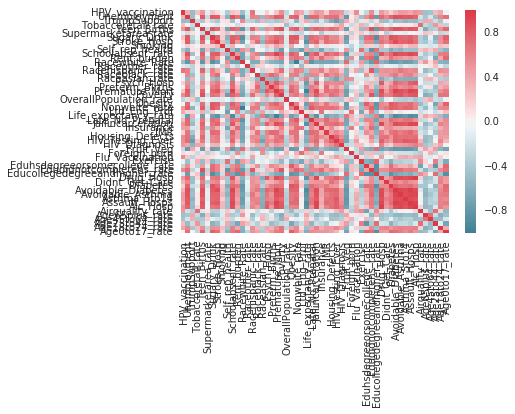

In [982]:
# take a look at the correlation matrix

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = df.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x156586910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1534de490>]], dtype=object)

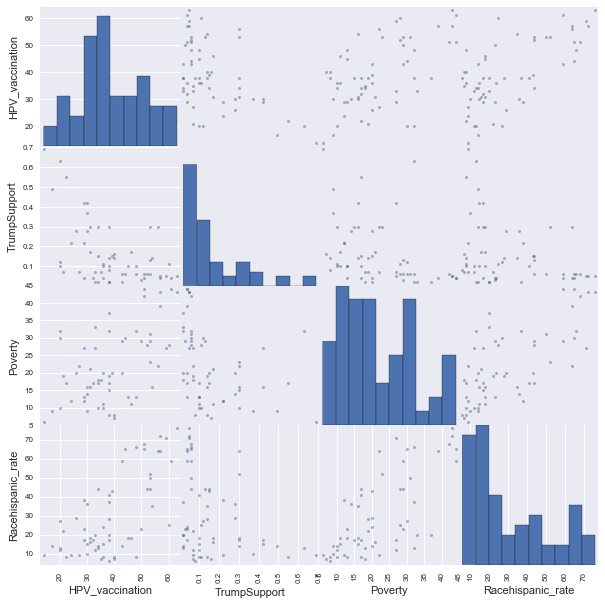

In [983]:
pd.scatter_matrix(data[['HPV_vaccination','TrumpSupport','Poverty','Racehispanic_rate']],figsize=(10,10))

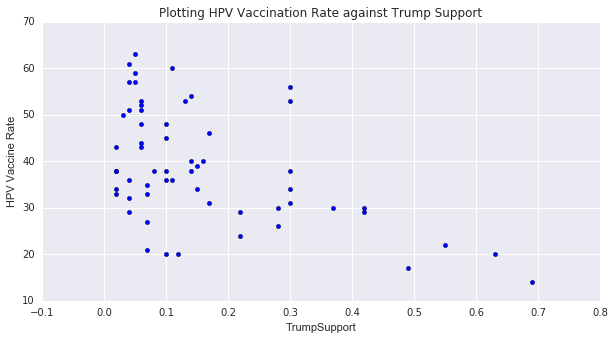

In [984]:
# let's go into the features. my first hypothesis was that Trump support would predict low vaccine rates

plt.figure(figsize=(10,5))
plt.scatter(data['TrumpSupport'], data['HPV_vaccination'])
plt.title("Plotting HPV Vaccination Rate against Trump Support")
plt.ylabel('HPV Vaccine Rate')
plt.xlabel('TrumpSupport')
plt.show()

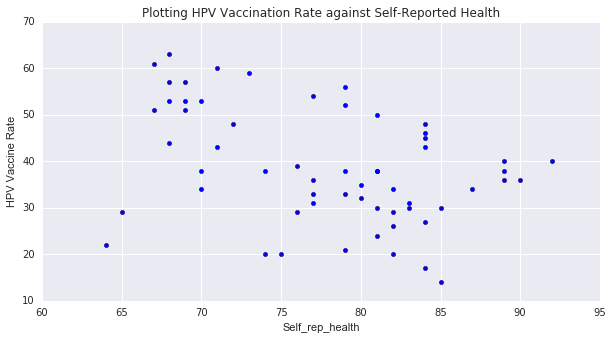

In [985]:
plt.figure(figsize=(10,5))
plt.scatter(data['Self_rep_health'], data['HPV_vaccination'])
plt.title("Plotting HPV Vaccination Rate against Self-Reported Health")
plt.ylabel('HPV Vaccine Rate')
plt.xlabel('Self_rep_health')
plt.show()

In [986]:
import statsmodels.api as sm
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split

In [987]:
#dropping HPV_Vaccination, our dependent variable, from all of the features

all_features = data[['Unemployment','TrumpSupport','Tobaccoretail_rate','Teen_Births',
      'Supermarketarea_rate','Sugary_Drink','Stroke_Hosp','Smoking',
      'Self_rep_health','Schoolabsent_rate','Rent_burden',
      'Racewhite_Rate','Raceother_rate','Racehispanic_rate',
      'Raceblack_rate','Raceasian_rate','Psych_Hosp','Preterm_Births',
      'Premature_Mort','Poverty','OverallPopulation_rate','Obesity',
      'Nonwhite_rate','Ltd_Eng_Prof','Life_expectancy_rate',
      'Late_No_Prenatal','Jailincarceration','Insurance','IMR','Housing_Defects','HIV_Testing_Ever',
      'HIV_Diagnosis','Fruit_Veg','Foreign_born','Flu_Vaccination',
      'Exercise','Eduhsdegreeorsomecollege_rate',
      'Edudidnotcompletehs_rate','Educollegedegreeandhigher_rate',
      'Drug_Hosp','Didnt_Get_Care','Diabetes','Avoidable_Diabetes',
      'Avoidable_Asthma','Asthma_5to14',
      'Assault_Hosps','Alc_Hosp','Airquality_rate','Age65plus_rate',
      'Age45to64_rate','Age25to44_rate','Age18to24_rate',
      'Age0to17_rate']]

In [988]:
# these are the variables that I think are important, intuitively

feature_set = data[['TrumpSupport','Poverty',
      'Insurance','Flu_Vaccination','Eduhsdegreeorsomecollege_rate']]

In [989]:
X = feature_set
y = data['HPV_vaccination']

In [990]:
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        HPV_vaccination   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     27.16
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           1.64e-13
Time:                        17:02:32   Log-Likelihood:                -193.85
No. Observations:                  59   AIC:                             399.7
Df Residuals:                      53   BIC:                             412.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                             7.1982     10.005      0.719      0.475       -12.869    27.265
TrumpSupport                    -15.4989      6.433     -2.409      0.019       -28.401    -2.597
Poverty                           0.3470      0.122      2.848      0.006         0.103     0.591
Insurance                         0.7858      0.187      4.201      0.000         0.411     1.161
Flu_Vaccination                   0.7267      0.210      3.467      0.001         0.306     1.147
Eduhsdegreeorsomecollege_rate    -0.4626      0.093     -4.950      0.000        -0.650    -0.275
==============================================================================
Omnibus:                        2.821   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                1.965
Skew:                           0.292   Prob(JB):                        0.374
Kurtosis:                       3.677   Cond. No.                         733.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

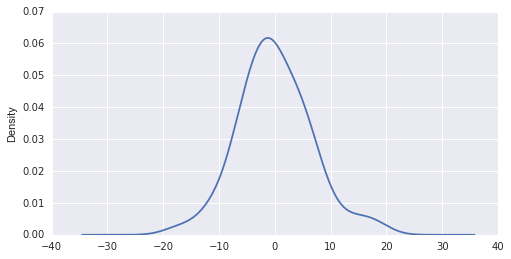

In [991]:
# the residuals appear normally distributed

residuals = y - est.predict(X)
residuals.plot(kind="density", figsize=(8,4))

In [992]:
# how correlation are my features?

feature_set.corr()

,TrumpSupport,Poverty,Insurance,Flu_Vaccination,Eduhsdegreeorsomecollege_rate
TrumpSupport,1.000000,-0.377047,-0.171390,-0.300323,0.114680
Poverty,-0.377047,1.000000,0.592373,0.269490,0.322741
Insurance,-0.171390,0.592373,1.000000,0.011902,0.389201
Flu_Vaccination,-0.300323,0.269490,0.011902,1.000000,-0.274050
Eduhsdegreeorsomecollege_rate,0.114680,0.322741,0.389201,-0.274050,1.000000


                               HPV_vaccination  TrumpSupport   Poverty  \
HPV_vaccination                       1.000000     -0.514131  0.543315   
TrumpSupport                         -0.514131      1.000000 -0.377047   
Poverty                               0.543315     -0.377047  1.000000   
Insurance                             0.439557     -0.171390  0.592373   
Flu_Vaccination                       0.551805     -0.300323  0.269490   
Eduhsdegreeorsomecollege_rate        -0.285011      0.114680  0.322741   

                               Insurance  Flu_Vaccination  \
HPV_vaccination                 0.439557         0.551805   
TrumpSupport                   -0.171390        -0.300323   
Poverty                         0.592373         0.269490   
Insurance                       1.000000         0.011902   
Flu_Vaccination                 0.011902         1.000000   
Eduhsdegreeorsomecollege_rate   0.389201        -0.274050   

                               Eduhsdegreeorsomecolle

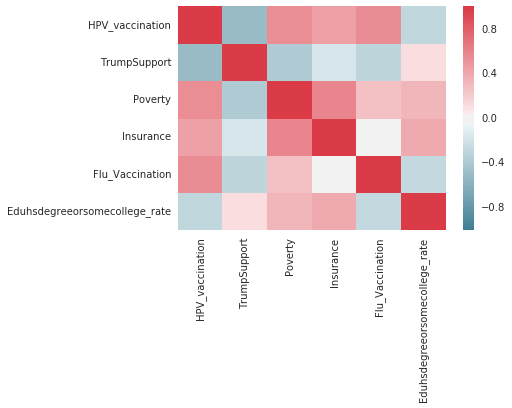

In [993]:

correlation_set = data[['HPV_vaccination','TrumpSupport','Poverty',
      'Insurance','Flu_Vaccination','Eduhsdegreeorsomecollege_rate']].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
print correlation_set
print sns.heatmap(correlation_set, cmap=cmap)

In [994]:
# Now let's take a look at all of the features

from sklearn import linear_model, metrics
%pylab inline

X = all_features

lm = linear_model.LinearRegression().fit(X, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(X))
print 'OLS R2:', lm.score(X, y)

lm = linear_model.Lasso().fit(X, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(X))
print 'Lasso R2:', lm.score(X, y)

lm = linear_model.Ridge().fit(X, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(X))
print 'Ridge R2:', lm.score(X, y)

Populating the interactive namespace from numpy and matplotlib
~~~ OLS ~~~
OLS MSE:  0.627579732143
OLS R2: 0.99578790119
~~~ Lasso ~~~
Lasso MSE:  10.4190738463
Lasso R2: 0.930070768227
~~~ Ridge ~~~
Ridge MSE:  1.98708564087
Ridge R2: 0.986663366209


In [995]:
# Even though R2 has a lower R2, I choose to use it due to the small no of features

In [996]:
from sklearn import grid_search

X = all_features

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    param_grid={'alpha': alphas},
    scoring='r2')

gs.fit(X, y)

print gs.fit
print gs.best_score_
print gs.best_estimator_

<bound method GridSearchCV.fit of GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)>
0.261381742898
Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [997]:
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X, y)

print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lasso.predict(X))
print 'Lasso R2:', lasso.score(X, y)
print lasso.coef_ 

~~~ Lasso ~~~
Lasso MSE:  19.3803330085
Lasso R2: 0.869925886045
[ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.01288145e-02  -0.00000000e+00  -3.32621105e-02  -0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00  -9.02702251e-02
   0.00000000e+00   8.88631930e-02  -0.00000000e+00   0.00000000e+00
  -1.07721826e-02   0.00000000e+00  -5.30500104e-02   0.00000000e+00
  -1.55249787e-05  -0.00000000e+00   1.31963851e-01   9.82417279e-02
   0.00000000e+00   0.00000000e+00   6.19160549e-02   0.00000000e+00
   0.00000000e+00   9.47537165e-03   0.00000000e+00   1.02819573e-02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -3.38814422e-01   0.00000000e+00   0.00000000e+00  -2.03751989e-03
  -0.00000000e+00  -0.00000000e+00  -1.58465156e-02  -2.17143486e-03
  -0.00000000e+00  -0.00000000e+00   1.78806635e-02   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00]


In [998]:
names = X.columns

print "Coefficients"
print zip(map(lambda x: round(x, 4), lasso.coef_), names)

Coefficients
[(-0.0, 'Unemployment'), (-0.0, 'TrumpSupport'), (0.0, 'Tobaccoretail_rate'), (0.0, 'Teen_Births'), (0.0101, 'Supermarketarea_rate'), (-0.0, 'Sugary_Drink'), (-0.0333, 'Stroke_Hosp'), (-0.0, 'Smoking'), (-0.0, 'Self_rep_health'), (-0.0, 'Schoolabsent_rate'), (-0.0, 'Rent_burden'), (-0.0903, 'Racewhite_Rate'), (0.0, 'Raceother_rate'), (0.0889, 'Racehispanic_rate'), (-0.0, 'Raceblack_rate'), (0.0, 'Raceasian_rate'), (-0.0108, 'Psych_Hosp'), (0.0, 'Preterm_Births'), (-0.0531, 'Premature_Mort'), (0.0, 'Poverty'), (-0.0, 'OverallPopulation_rate'), (-0.0, 'Obesity'), (0.132, 'Nonwhite_rate'), (0.0982, 'Ltd_Eng_Prof'), (0.0, 'Life_expectancy_rate'), (0.0, 'Late_No_Prenatal'), (0.0619, 'Jailincarceration'), (0.0, 'Insurance'), (0.0, 'IMR'), (0.0095, 'Housing_Defects'), (0.0, 'HIV_Testing_Ever'), (0.0103, 'HIV_Diagnosis'), (0.0, 'Fruit_Veg'), (0.0, 'Foreign_born'), (0.0, 'Flu_Vaccination'), (0.0, 'Exercise'), (-0.3388, 'Eduhsdegreeorsomecollege_rate'), (0.0, 'Edudidnotcompletehs_ra

In [999]:
# trying using ridge

X = all_features

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='r2')

gs.fit(X, y)

print gs.fit
print gs.best_score_
print gs.best_estimator_

<bound method GridSearchCV.fit of GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)>
0.371605019213
Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [1000]:
ridge = linear_model.Ridge(alpha=1000)
ridge.fit(X, y)

print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, ridge.predict(X))
print 'Ridge R2:', ridge.score(X, y)
print ridge.coef_

~~~ Ridge ~~~
Ridge MSE:  11.5847853384
Ridge R2: 0.922246914561
[ -6.09403660e-03  -2.13014483e-04   5.19811808e-02   8.44721951e-02
   1.07930515e-02  -7.97264147e-02  -2.88573704e-02   1.79260007e-02
  -4.81496263e-02  -5.30582624e-02  -1.55017016e-01  -1.08880198e-01
   5.21806234e-03   1.08752172e-01  -4.54758855e-02   5.46776869e-02
  -9.37231170e-03   6.50791482e-02  -2.72272716e-02  -3.58497934e-02
  -5.14475502e-06  -6.62008270e-02   1.08880198e-01   8.71596582e-02
   1.06170716e-02   3.51230581e-02   6.33839662e-02   6.14221302e-03
   1.57573410e-02   7.62483736e-02   6.43060408e-02   1.97899323e-02
   4.37588043e-02   8.54777991e-02   7.75846262e-02   5.14556176e-02
  -1.65624903e-01   1.23533738e-01   5.81224329e-02   2.41826296e-03
  -3.06347056e-02  -1.90015213e-02  -6.96145112e-04  -6.73074838e-03
  -3.64866198e-03  -6.95210130e-02   1.06757290e-02   1.10771918e-02
   2.83528021e-02   2.41810216e-03   1.07112266e-01  -3.36297985e-02
  -1.11740280e-01]


In [1001]:
# let's try to take a reduced sample - I still choose the features though

new_set = data[['Unemployment','TrumpSupport','Teen_Births',
      'Self_rep_health','Rent_burden','Poverty','Nonwhite_rate',
     'Insurance','Housing_Defects','HIV_Testing_Ever',
      'HIV_Diagnosis','Fruit_Veg','Flu_Vaccination',
      'Exercise','Eduhsdegreeorsomecollege_rate']]

In [1002]:
X = new_set

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    param_grid={'alpha': alphas},
    scoring='r2')

gs.fit(X, y)

print gs.fit
print gs.best_score_
print gs.best_estimator_

<bound method GridSearchCV.fit of GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)>
-0.147811654312
Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [1003]:
lasso = linear_model.Lasso(alpha=10)
lasso.fit(X, y)

print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lasso.predict(X))
print 'Lasso R2:', lasso.score(X, y)
print lasso.coef_ 

~~~ Lasso ~~~
Lasso MSE:  41.3372403917
Lasso R2: 0.722558693139
[-0.          0.          0.1122093  -0.06111408  0.          0.130493
  0.27499596  0.          0.          0.          0.04583483 -0.
  0.06397537 -0.         -0.65826889]


In [1004]:
names = X.columns

print "Coefficients"
print zip(map(lambda x: round(x, 4), lasso.coef_), names)

Coefficients
[(-0.0, 'Unemployment'), (0.0, 'TrumpSupport'), (0.1122, 'Teen_Births'), (-0.0611, 'Self_rep_health'), (0.0, 'Rent_burden'), (0.1305, 'Poverty'), (0.275, 'Nonwhite_rate'), (0.0, 'Insurance'), (0.0, 'Housing_Defects'), (0.0, 'HIV_Testing_Ever'), (0.0458, 'HIV_Diagnosis'), (-0.0, 'Fruit_Veg'), (0.064, 'Flu_Vaccination'), (-0.0, 'Exercise'), (-0.6583, 'Eduhsdegreeorsomecollege_rate')]


In [1005]:
X = data[['Teen_Births','Self_rep_health','Nonwhite_rate','Poverty','HIV_Diagnosis',\
          'Flu_Vaccination','Eduhsdegreeorsomecollege_rate']]

In [1006]:
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        HPV_vaccination   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     24.72
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           2.56e-14
Time:                        17:02:36   Log-Likelihood:                -187.67
No. Observations:                  59   AIC:                             391.3
Df Residuals:                      51   BIC:                             408.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
const                            58.1058     18.573      3.128      0.003        20.819    95.393
Teen_Births                       0.2146      0.181      1.186      0.241        -0.149     0.578
Self_rep_health                  -0.4106      0.194     -2.112      0.040        -0.801    -0.020
Nonwhite_rate                     0.2483      0.061      4.051      0.000         0.125     0.371
Poverty                          -0.0487      0.200     -0.244      0.808        -0.450     0.352
HIV_Diagnosis                     0.0590      0.051      1.159      0.252        -0.043     0.161
Flu_Vaccination                   0.4710      0.199      2.370      0.022         0.072     0.870
Eduhsdegreeorsomecollege_rate    -0.7344      0.104     -7.043      0.000        -0.944    -0.525
==============================================================================
Omnibus:                        1.539   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                0.912
Skew:                           0.277   Prob(JB):                        0.634
Kurtosis:                       3.255   Cond. No.                     2.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

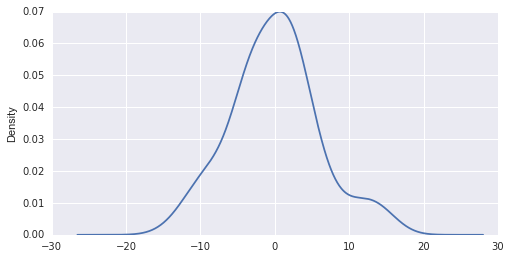

In [1007]:
residuals = y - est.predict(X)
residuals.plot(kind="density", figsize=(8,4))

                               HPV_vaccination  Unemployment  TrumpSupport  \
HPV_vaccination                       1.000000      0.352816     -0.514131   
Unemployment                          0.352816      1.000000     -0.487870   
TrumpSupport                         -0.514131     -0.487870      1.000000   
Teen_Births                           0.497002      0.823331     -0.415560   
Self_rep_health                      -0.389013     -0.591853      0.086322   
Rent_burden                           0.196921      0.683882     -0.058197   
Poverty                               0.543315      0.768518     -0.377047   
Nonwhite_rate                         0.481774      0.796825     -0.563608   
Insurance                             0.439557      0.475164     -0.171390   
Housing_Defects                       0.552469      0.687768     -0.619414   
HIV_Testing_Ever                      0.535759      0.715519     -0.753310   
HIV_Diagnosis                         0.493900      0.406236    

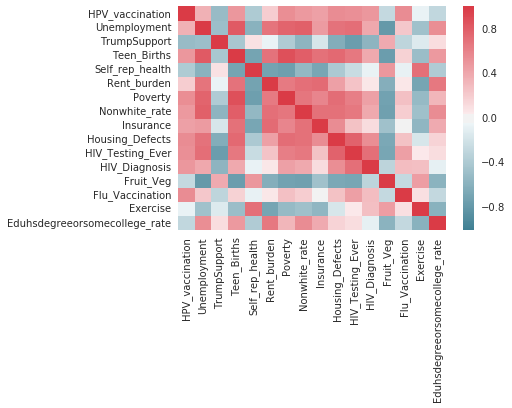

In [1012]:
# take a look at the correlation matrix


correlations = data[['HPV_vaccination','Unemployment','TrumpSupport','Teen_Births',
      'Self_rep_health','Rent_burden','Poverty','Nonwhite_rate',
     'Insurance','Housing_Defects','HIV_Testing_Ever',
      'HIV_Diagnosis','Fruit_Veg','Flu_Vaccination',
      'Exercise','Eduhsdegreeorsomecollege_rate']].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [1008]:
from sklearn import feature_selection, linear_model

X = all_features

def get_linear_model_metrics(X, y, algo):
    pvals = feature_selection.f_regression(X, y)[1]
    algo.fit(X,y)
    residuals = (y - algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    return algo

get_linear_model_metrics(X, y, linear_model.Lasso(alpha=10))

names = X.columns

print "-------------"
print "Coefficients:", sorted(zip(map(lambda x: round(x, 3), lasso.coef_), names))
print "-------------"
pvals_t = pvals[1]
print "P Values:", sorted(zip(map(lambda x: round(x, 6), pvals_t), names))

P Values: [  6.12923983e-03   3.11120447e-05   3.12010428e-02   6.22388955e-05
   4.47799878e-01   6.37527722e-02   3.93309699e-01   5.96546395e-01
   2.32636928e-03   5.62353914e-02   1.34942447e-01   1.11848214e-04
   3.58218679e-01   3.04157289e-09   6.12368645e-01   7.98603104e-01
   1.40515281e-01   9.98076715e-01   5.72986782e-02   8.72895114e-06
   3.03271248e-02   7.08068752e-01   1.11848214e-04   2.33287998e-03
   1.66300524e-01   2.01116279e-02   6.40384137e-05   4.95504796e-04
   1.85892171e-01   5.71446064e-06   1.22688618e-05   7.02898202e-05
   3.69177901e-02   3.29599359e-01   5.89521734e-06   6.23698602e-01
   2.86716090e-02   6.18405791e-06   2.73530515e-01   1.24990230e-04
   8.18963611e-03   1.58421843e-01   5.53522898e-03   1.38739149e-04
   2.06347579e-04   1.75894532e-03   2.87082658e-05   1.58407327e-04
   2.37959333e-04   4.22376504e-04   2.33917232e-02   1.51249438e-03
   9.69173739e-01]
Coefficients: [ -0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.0000

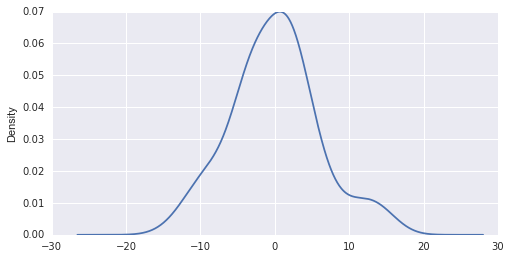

In [1009]:
# residual plot

residuals.plot(kind="density", figsize=(8,4))

In [1010]:
#what about just using the top features sorted by p-value?

X = data[['Racehispanic_rate','Edudidnotcompletehs_rate','Flu_Vaccination','Housing_Defects','Poverty',\
          'HIV_Testing_Ever','Alc_Hosp','TrumpSupport','Teen_Births','Jailincarceration','HIV_Diagnosis']]
X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        HPV_vaccination   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     11.57
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           5.05e-10
Time:                        17:02:43   Log-Likelihood:                -192.67
No. Observations:                  59   AIC:                             409.3
Df Residuals:                      47   BIC:                             434.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
const                       15.3675     14.116      1.089      0.282       -13.030    43.765
Racehispanic_rate            0.3254      0.095      3.433      0.001         0.135     0.516
Edudidnotcompletehs_rate     0.2250      0.287      0.783      0.437        -0.353     0.803
Flu_Vaccination              0.7296      0.260      2.805      0.007         0.206     1.253
Housing_Defects              0.1959      0.125      1.569      0.123        -0.055     0.447
Poverty                      0.0815      0.273      0.298      0.767        -0.469     0.631
HIV_Testing_Ever            -0.4048      0.221     -1.831      0.074        -0.850     0.040
Alc_Hosp                    -0.0074      0.006     -1.338      0.187        -0.019     0.004
TrumpSupport               -20.4872     10.066     -2.035      0.047       -40.738    -0.237
Teen_Births                 -0.3471      0.267     -1.301      0.199        -0.884     0.190
Jailincarceration            0.0373      0.027      1.393      0.170        -0.017     0.091
HIV_Diagnosis                0.2151      0.069      3.109      0.003         0.076     0.354
==============================================================================
Omnibus:                        0.490   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.384
Skew:                           0.193   Prob(JB):                        0.825
Kurtosis:                       2.911   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

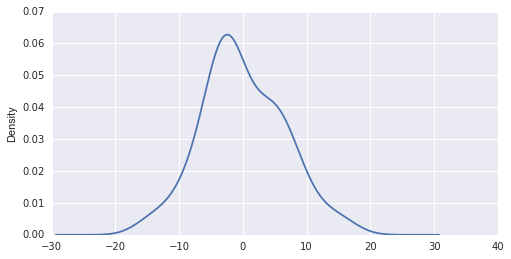

In [1011]:
# residual plot

residuals = y - est.predict(X)
residuals.plot(kind="density", figsize=(8,4))